# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=11BquVVgQTebvVO5NZ2TGA526rulbWBv5"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Analyzing Customer Sentiment
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1HfZvPCWAwKoYl1qogYlxD_CIZYxYw0aI)

![alt text](https://drive.google.com/uc?id=1XGc89Cxi0ooFQIc6o041cz8-qwXg7l3g)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
reviews_df = pd.read_csv('/content/amazon_alexa.tsv', sep='\t')
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
reviews_df.shape

(3150, 5)

In [5]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
reviews_df['verified_reviews'].value_counts()

verified_reviews
                                                                                                                                                                                                                                                                                                                                                            79
Love it!                                                                                                                                                                                                                                                                                                                                                    22
Love it                                                                                                                                                                                                                                                                                  

# TASK #3: EXPLORE DATASET

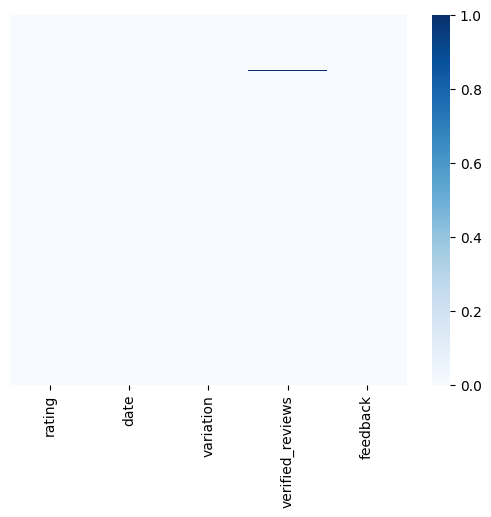

In [9]:
sns.heatmap(reviews_df.isnull(), cmap = 'Blues')
plt.yticks([]) # This removes the yticks
plt.show()

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

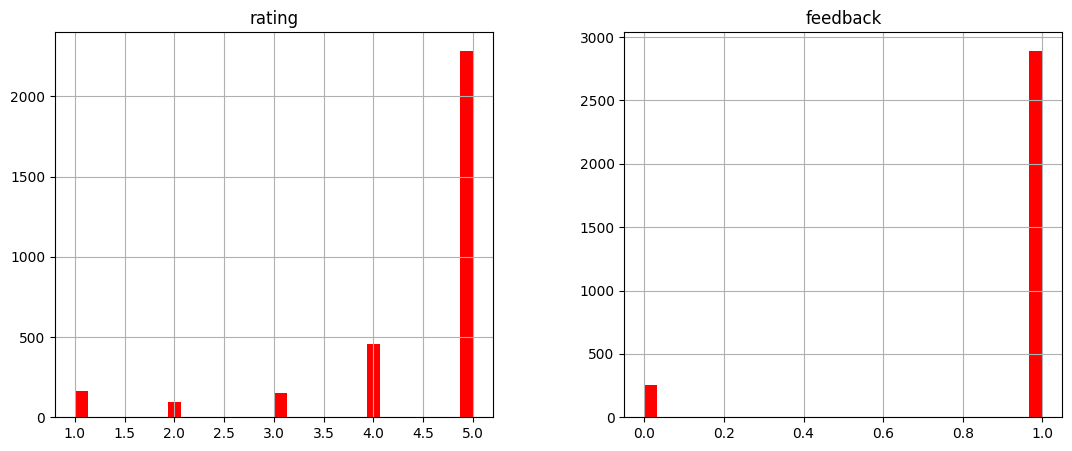

In [10]:
reviews_df.hist(bins = 30, figsize = (13, 5), color = 'r')

In [11]:
reviews_df['length'] = reviews_df['verified_reviews'].astype(str).apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

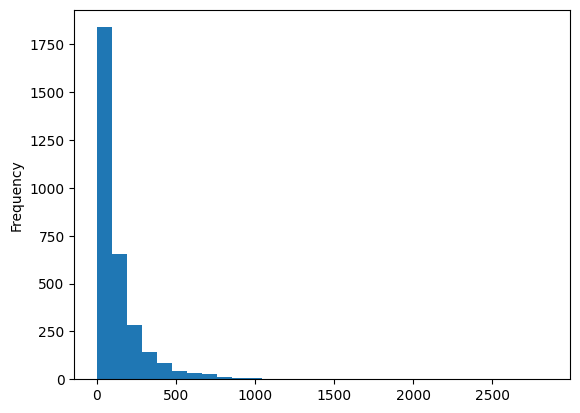

In [12]:
reviews_df['length'].plot(bins = 30, kind = 'hist')

In [13]:
reviews_df.length.describe()

count    3150.000000
mean      132.049206
std       182.100176
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [14]:
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [15]:
# Mean
reviews_df[reviews_df['length'] == 133]['verified_reviews'].iloc[0]

'Fun item to play with and get used to using.  Sometimes has hard time answering the questions you ask, but I think it will be better.'

In [17]:
positive = reviews_df[reviews_df['feedback'] == 1]
negative = reviews_df[reviews_df['feedback'] == 0]

In [18]:
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [19]:
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


<Axes: ylabel='count'>

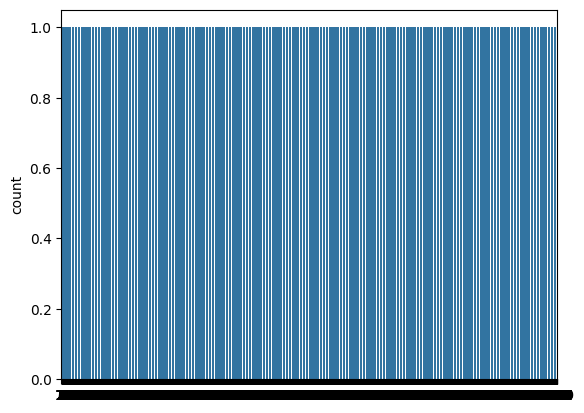

In [20]:
sns.countplot(reviews_df['feedback'],label = 'Count')

<Axes: xlabel='rating', ylabel='count'>

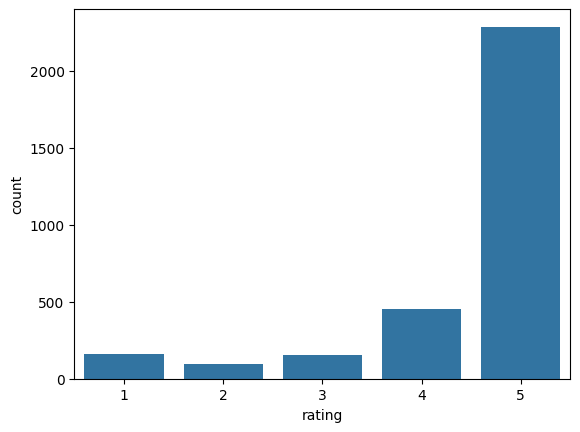

In [21]:
sns.countplot(x ='rating', data = reviews_df)

<ipython-input-22-d389ef29275a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette = 'deep' )


<Axes: xlabel='variation', ylabel='rating'>

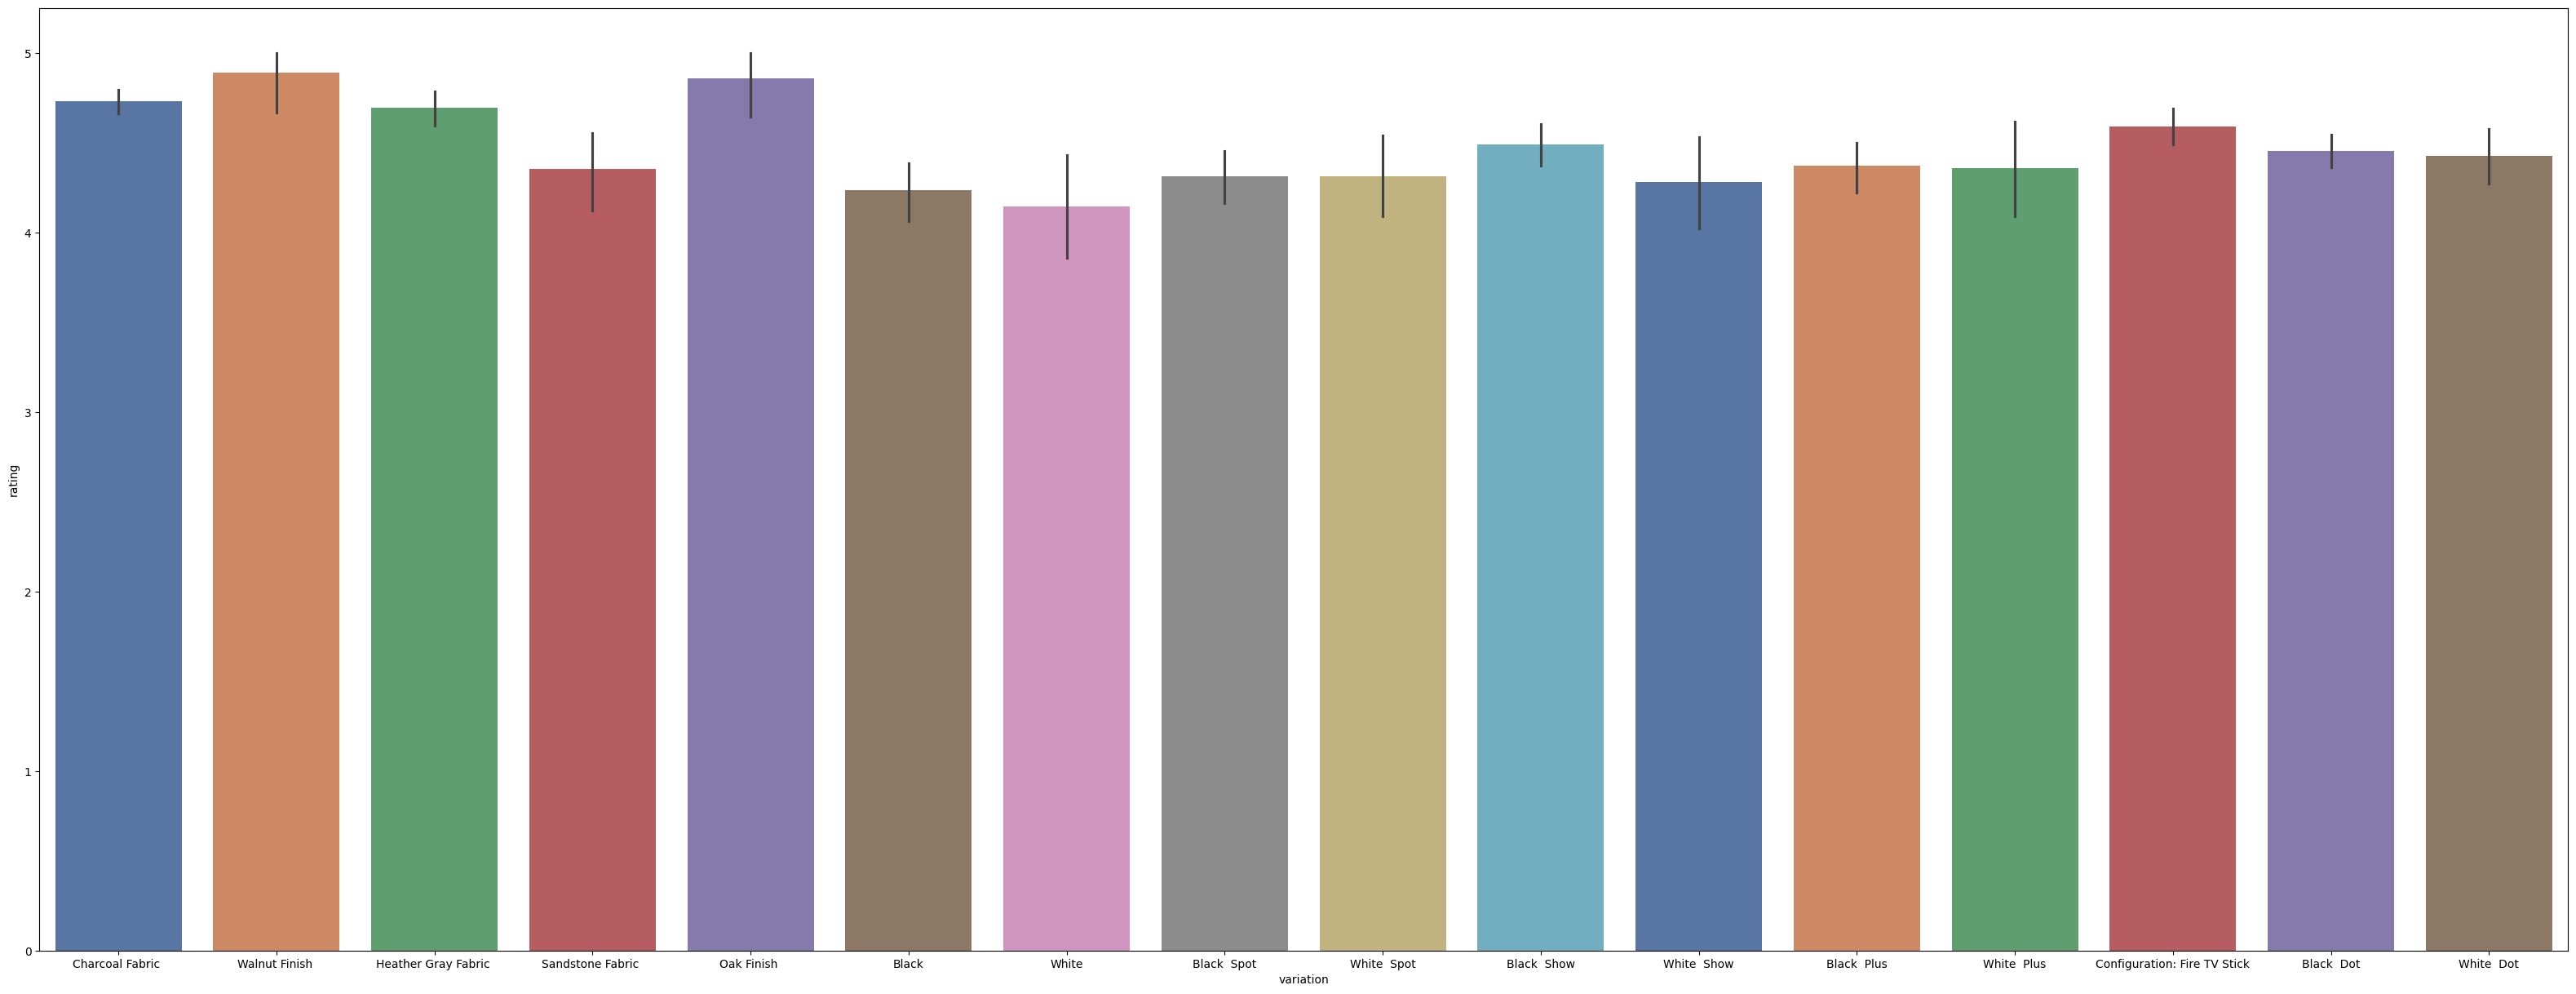

In [22]:
plt.figure(figsize = (40, 15))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette = 'deep' )

In [23]:
sentences = reviews_df['verified_reviews'].tolist()
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [25]:
# Convert all elements in the list to strings before joining
sentences_as_one_string = " ".join([str(sentence) for sentence in sentences])

print(sentences_as_one_string)

Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I've purchased. I'm working on get

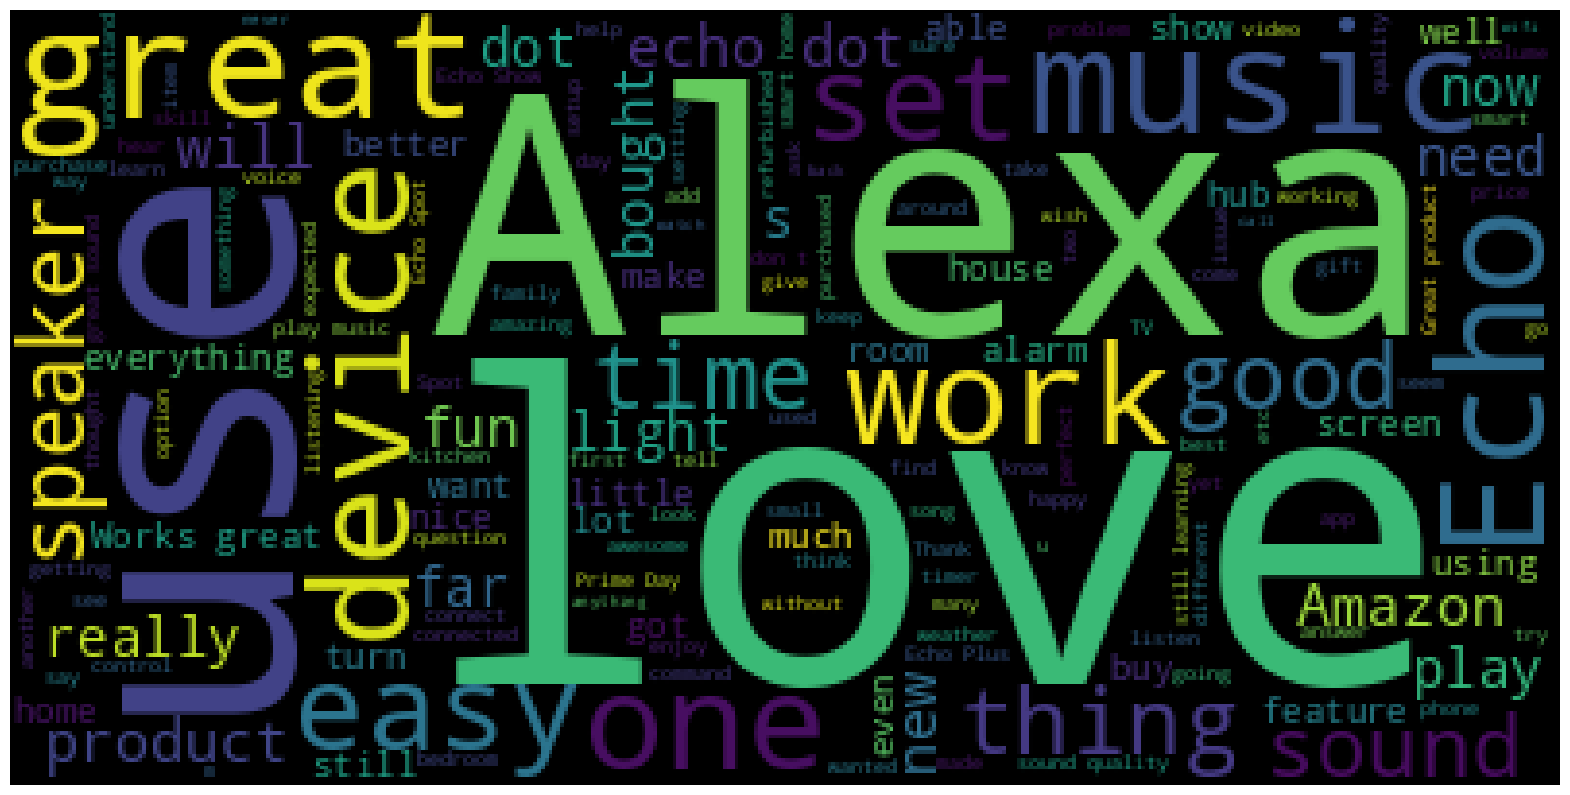

In [27]:
from wordcloud import WordCloud

plt.figure(figsize=(20,15))
plt.imshow(WordCloud().generate(sentences_as_one_string))
plt.axis("off")
plt.show()

In [28]:
negative_list = negative['verified_reviews'].tolist()
negative_list

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

In [30]:
negative_sentence_as_one_string = " ".join([str(sentence) for sentence in negative_list])

print(negative_sentence_as_one_string)

It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals. Sound is terrible if u want good music too get a bose Not much features. Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working? Sad joke. Worthless. Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa. It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it for that either. She randomly s

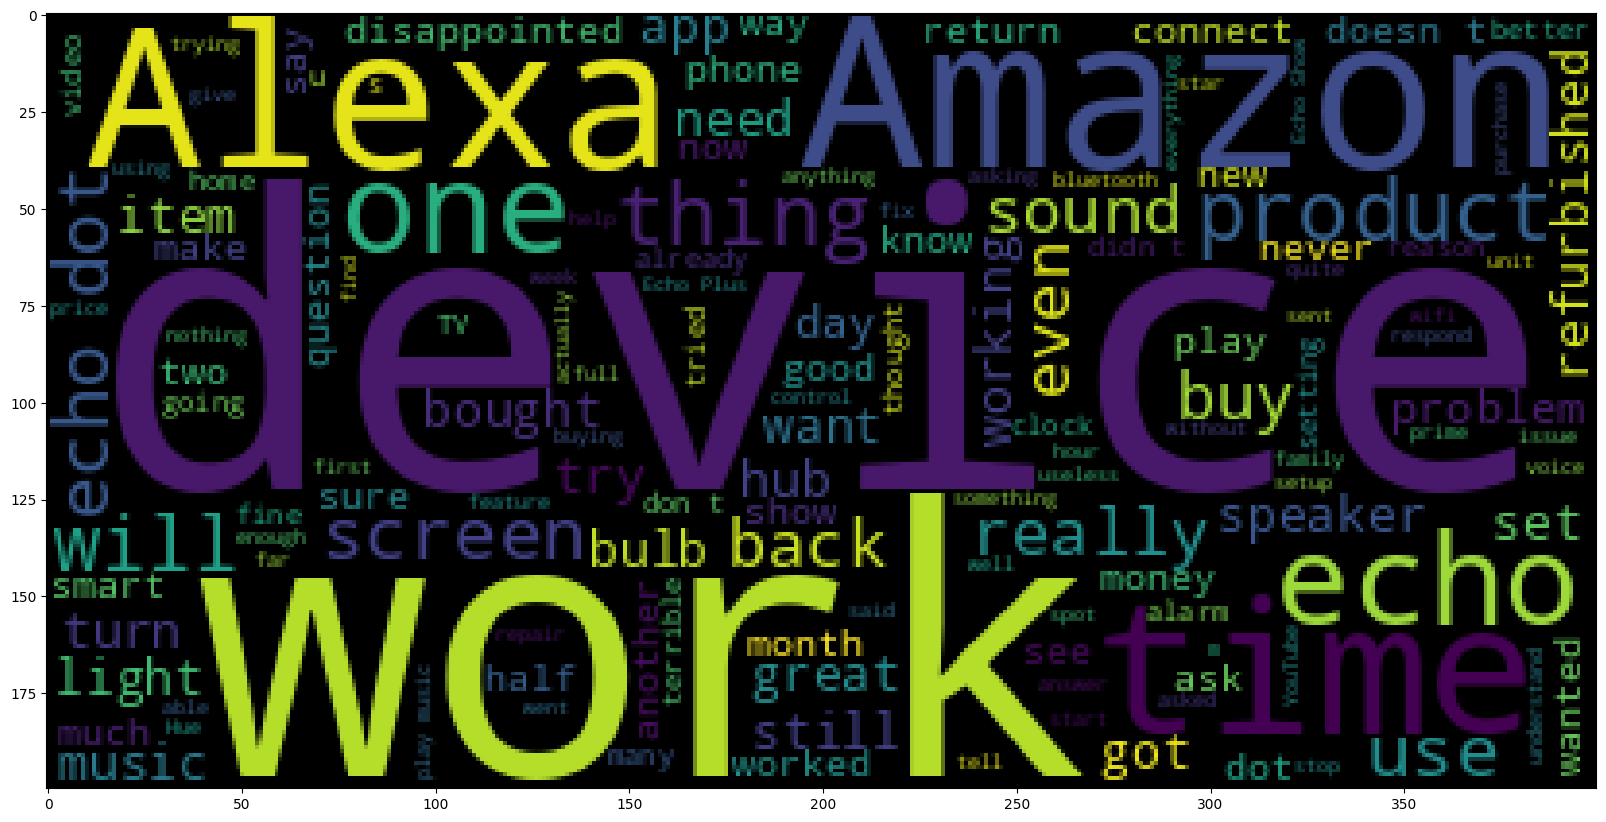

In [32]:
plt.figure(figsize = (20,15))
plt.imshow(WordCloud().generate(negative_sentence_as_one_string))

# TASK #4: PERFORM DATA CLEANING

In [33]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [34]:
reviews_df.drop(['date', 'rating', 'length'], axis=1)

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [35]:
# convert categorical variables

variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first = True)
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [36]:
reviews_df.drop(['variation'], axis=1, inplace=True)

In [37]:
reviews_df = pd.concat([reviews_df,variation_dummies], axis = 1)
reviews_df

,rating,date,verified_reviews,feedback,length,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,5,31-Jul-18,Love my Echo!,1,13,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,5,31-Jul-18,Loved it!,1,9,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,4,31-Jul-18,"Sometimes while playing a game, you can answer...",1,195,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,5,31-Jul-18,I have had a lot of fun with this thing. My 4 ...,1,172,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,5,31-Jul-18,Music,1,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,"Perfect for kids, adults and everyone in betwe...",1,50,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,5,30-Jul-18,"Listening to music, searching locations, check...",1,135,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,5,30-Jul-18,"I do love these things, i have them running my...",1,441,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,5,30-Jul-18,Only complaint I have is that the sound qualit...,1,380,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
im

# TASK #5: LEARN HOW TO REMOVE PUNCTUATION FROM TEXT

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
test = "Hello Mr. Future, I am so happy to be learning AI nor!"

In [40]:
test_punc_removed = [char for char in test if char not in string.punctuation]
test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'r']

In [42]:
test_punc_removede_join = ''.join(test_punc_removed)
test_punc_removede_join

'Hello Mr Future I am so happy to be learning AI nor'

# TASK 6: UNDERSTAND HOW TO REMOVE STOPWORDS

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
test_punc_removede_join

'Hello Mr Future I am so happy to be learning AI nor'

In [48]:
test_punc_removede_join_clean = [word for word in test_punc_removede_join.split() if word.lower() not in stopwords.words('english')]
test_punc_removede_join_clean

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AI']

# TASK 7: UNDERSTAND HOW TO PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.', 'This document is the second document.', 'And this is the third one.', 'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

# Use get_feature_names_out() instead of get_feature_names()
print(vectorizer.get_feature_names_out())


['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [52]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


![alt text](https://drive.google.com/uc?id=1eQi-Gq66e-sNw1ZvGs-zkJg95mCYdFoJ)

# TASK #8: PERFORM DATA CLEANING BY APPLYING EVERYTHING WE LEARNED SO FAR!

In [59]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
  if isinstance(message, str): # Check if the message is a string
    test_punc_removed = [char for char in message if char not in string.punctuation] # Use assignment operator '=' instead of '-'
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removede_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removede_join_clean
  else:
    return message # Return the original message if it is not a string

In [60]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [63]:
print(reviews_df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [66]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
  if isinstance(message, str): # Check if the message is a string
    test_punc_removed = [char for char in message if char not in string.punctuation] # Use assignment operator '=' instead of '-'
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removede_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removede_join_clean
  else:
    return [] # Return an empty list if the message is not a string to avoid errors in CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

# Handle np.nan values before fitting the CountVectorizer
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].fillna('')  # Replace np.nan with empty strings

vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [67]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [68]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
reviews_df.drop(['verified_reviews'], axis =1, inplace = True)
reviews_df

,rating,date,feedback,length,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,5,31-Jul-18,1,13,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,5,31-Jul-18,1,9,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,4,31-Jul-18,1,195,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,5,31-Jul-18,1,172,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,5,31-Jul-18,1,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,1,50,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,5,30-Jul-18,1,135,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,5,30-Jul-18,1,441,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,5,30-Jul-18,1,380,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [70]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
reviews

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
reviews_df = pd.concat([reviews_df, reviews], axis =1)
reviews_df

,rating,date,feedback,length,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,5,31-Jul-18,1,13,False,False,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
1,5,31-Jul-18,1,9,False,False,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
2,4,31-Jul-18,1,195,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,5,31-Jul-18,1,172,False,False,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
4,5,31-Jul-18,1,5,False,False,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,1,50,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3146,5,30-Jul-18,1,135,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3147,5,30-Jul-18,1,441,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3148,5,30-Jul-18,1,380,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X = reviews_df.drop(['feedback'], axis=1)
y = reviews_df['feedback']

In [74]:
X

,rating,date,length,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,5,31-Jul-18,13,False,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,5,31-Jul-18,9,False,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
2,4,31-Jul-18,195,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,5,31-Jul-18,172,False,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
4,5,31-Jul-18,5,False,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,50,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3146,5,30-Jul-18,135,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3147,5,30-Jul-18,441,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3148,5,30-Jul-18,380,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [75]:
y.shape

(3150,)

# TASK #9: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

![alt text](https://drive.google.com/uc?id=1Xox54bvjhGOhrG-fSxEUIEgw1R3g-RIt)

![alt text](https://drive.google.com/uc?id=18Z4ug4UuyQG79lyPKs1zQwtrP_S4_yoU)

![alt text](https://drive.google.com/uc?id=1sVLtg8GaE3ZhNEZX1WJbxs7KAQyQ5dpX)

![alt text](https://drive.google.com/uc?id=1NT6Fm-lWUWNsu9i8uzVS4Q5pcm5gp8RK)

![alt text](https://drive.google.com/uc?id=1C32q5Uguymr9012x1lzRD5btnvJ-kW9r)

![alt text](https://drive.google.com/uc?id=1g5aXo5E-RIjRBy6-LLLA8gjG2j9dIL5X)

![alt text](https://drive.google.com/uc?id=106OXP_z89Hqh1JYVaROIbst0N0CgFRuT)

![alt text](https://drive.google.com/uc?id=1AXTHZ9KVUsJjMm9Whc4Adi5T4OznsSYn)

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [79]:
# Convert all feature/column names to strings
X_train.columns = X_train.columns.astype(str)

# Convert the 'date' column to datetime objects and then to numerical features
# Assuming the 'date' column exists and contains dates like '30-Jul-18'
X_train['date'] = pd.to_datetime(X_train['date'], format='%d-%b-%y')  # Adjust format if needed
X_train['date_ordinal'] = X_train['date'].apply(lambda date: date.toordinal())  # Convert to ordinal

# Now try fitting the model again
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train.drop('date', axis=1), y_train)  # Exclude the original 'date' column

MultinomialNB()

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

![alt text](https://drive.google.com/uc?id=14_ft6Wiu-VaiU_5Ew2nS7EGGr3oLLQf8)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
X_train_modified = X_train.drop('date', axis=1)  # Assuming 'date' is a column name
y_predict_train = naive_bayes.predict(X_train_modified)
y_predict_train

array([1, 1, 1, ..., 1, 1, 1])

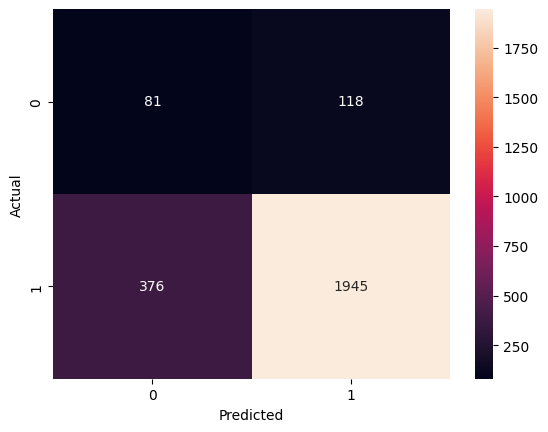

In [86]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [90]:
# Convert all column names to strings
X_test_modified = X_test.columns.astype(str)

# Now try predicting again
y_predict_test = naive_bayes.predict(X_test_modified)
y_predict_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'rating'

In [94]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are already defined and preprocessed
logistic_regression = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logistic_regression.fit(X_train_modified, y_train)  # Use the modified X_train without 'date'

# Convert 'date' column to datetime if it exists and then to ordinal
if 'date' in X_test.columns:
    X_test['date'] = pd.to_datetime(X_test['date']) # Convert to datetime first
    X_test['date_ordinal'] = X_test['date'].apply(lambda x: x.toordinal())

# Now try predicting again, dropping 'date' if it exists
y_predict_test = logistic_regression.predict(X_test.drop('date', axis=1, errors='ignore'))


# Evaluate performance
cm_test = confusion_matrix(y_test, y_predict_test)
print("Confusion Matrix (Test Set):\n", cm_test)

print(classification_report(y_test, y_predict_test))

Confusion Matrix (Test Set):
 [[ 58   0]
 [  0 572]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       572

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



<ipython-input-94-66d4343591ba>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_test['date'] = pd.to_datetime(X_test['date']) # Convert to datetime first


# TASK #12: ASSIGNMENT - TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS